In [1]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.3/817.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.25.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.1/117.1 kB 1.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.4 which is incompatible.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.25.0 which is incompatible.


In [2]:
!pip install tensorflow==2.0.0.alpha0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0.alpha0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.17.0rc0)
ERROR: No matching distribution found for tensorflow==2.0.0.alpha0


In [3]:
!git clone https://github.com/python-pillow/Pillow/
%cd /content/Pillow/depends
!bash install_raqm.sh

Cloning into 'Pillow'...
remote: Enumerating objects: 85731, done.
remote: Counting objects: 100% (573/573), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 85731 (delta 344), reused 376 (delta 271), pack-reused 85158
Receiving objects: 100% (85731/85731), 197.24 MiB | 18.94 MiB/s, done.
Resolving deltas: 100% (63862/63862), done.
Updating files: 100% (1699/1699), done.
/content/Pillow/depends
2024-06-19 13:43:35 URL:https://raw.githubusercontent.com/python-pillow/pillow-depends/main/libraqm-0.10.1.tar.gz [300244/300244] -> "libraqm-0.10.1.tar.gz" [1]
rmdir: failed to remove 'libraqm-0.10.1': No such file or directory
libraqm-0.10.1/
libraqm-0.10.1/.ci/
libraqm-0.10.1/.ci/deploy-docs.sh
libraqm-0.10.1/.github/
libraqm-0.10.1/.github/workflows/
libraqm-0.10.1/.github/workflows/ci.yml
libraqm-0.10.1/AUTHORS
libraqm-0.10.1/CODING.md
libraqm-0.10.1/COPYING
libraqm-0.10.1/NEWS
libraqm-0.10.1/README.md
libraqm-0.10.1/docs/
libraqm-0.10.1/docs/meson.build
libraqm-0.10.1

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import Sequence

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
dataset_df = pd.read_csv("/content/drive/MyDrive/data_balita.csv")

Mounted at /content/drive


In [6]:
# Check for missing values
dataset_df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

In [7]:
# Check for duplicates
dataset_df.duplicated().sum()

81574

In [8]:
# Drop missing values
dataset_df.dropna(axis=0, inplace=True)

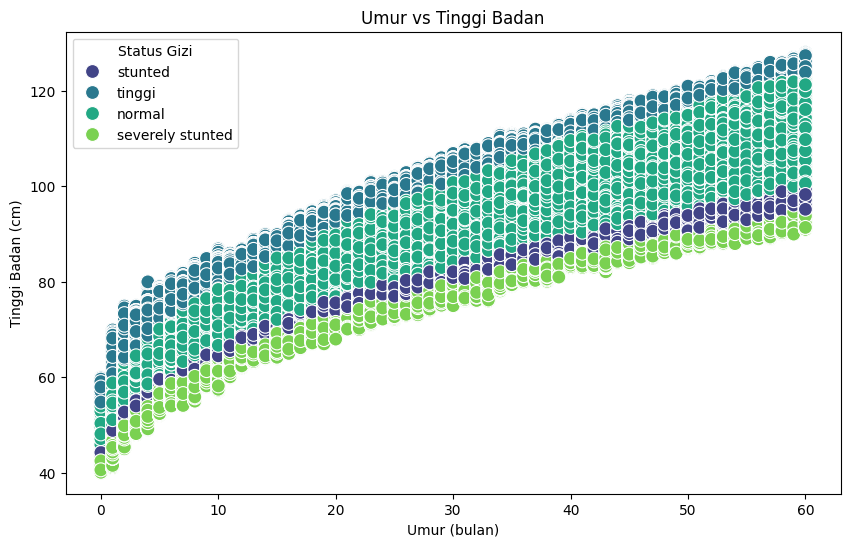

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataset_df, x='Umur (bulan)', y='Tinggi Badan (cm)', hue='Status Gizi', palette='viridis', s=100)
plt.title('Umur vs Tinggi Badan')
plt.show()

In [10]:
# Melakukan encoding pada kolom Jenis Kelamin dan Status Gizi
label_encoder = LabelEncoder()
dataset_df['Jenis Kelamin'] = label_encoder.fit_transform(dataset_df['Jenis Kelamin'])
dataset_df['Status Gizi'] = label_encoder.fit_transform(dataset_df['Status Gizi'])

# Split features and target
X = dataset_df.drop('Status Gizi', axis=1).values
y = dataset_df['Status Gizi'].values

# Membagi data menjadi data pelatihan dan data pengujian (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [11]:
import numpy as np
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, data, labels, batch_size=32, shuffle=True):
        self.data = data
        self.labels = labels
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.data) / self.batch_size))

    def __getitem__(self, index):
        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Generate data for the batch
        batch_data = self.data[batch_indexes]
        batch_labels = self.labels[batch_indexes]

        return batch_data, batch_labels

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.data))
        if self.shuffle:
            np.random.shuffle(self.indexes)


In [12]:
from sklearn.preprocessing import StandardScaler

# Normalisasi Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Create Data Generators
batch_size = 32
train_generator = DataGenerator(X_train, y_train, batch_size=batch_size)
test_generator = DataGenerator(X_test, y_test, batch_size=batch_size)

In [14]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97:
            print("\nTarget telah dicapai, berhenti training !!!")
            self.model.stop_training = True

In [15]:
# Mendefinisikan Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout untuk regularisasi
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(4, activation='softmax')  # output layer dengan 4 neuron sesuai dengan jumlah kelas
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Custom callback
my_callback = myCallback()


In [16]:
# Train the model using the data generators
history = model.fit(train_generator, validation_data=test_generator, epochs=1000, callbacks=[my_callback])

Epoch 1/1000
2646/2646 [==============================] - 13s 4ms/step - loss: 0.4056 - accuracy: 0.8358 - val_loss: 0.1277 - val_accuracy: 0.9526
Epoch 2/1000
2646/2646 [==============================] - 9s 4ms/step - loss: 0.2238 - accuracy: 0.9146 - val_loss: 0.1024 - val_accuracy: 0.9620
Epoch 3/1000
2646/2646 [==============================] - 12s 4ms/step - loss: 0.1886 - accuracy: 0.9266 - val_loss: 0.0928 - val_accuracy: 0.9688
Epoch 4/1000
2646/2646 [==============================] - 12s 4ms/step - loss: 0.1684 - accuracy: 0.9327 - val_loss: 0.1010 - val_accuracy: 0.9607
Epoch 5/1000
2646/2646 [==============================] - 10s 4ms/step - loss: 0.1586 - accuracy: 0.9365 - val_loss: 0.0894 - val_accuracy: 0.9674
Epoch 6/1000
2646/2646 [==============================] - 11s 4ms/step - loss: 0.1492 - accuracy: 0.9404 - val_loss: 0.0812 - val_accuracy: 0.9667
Epoch 7/1000
2646/2646 [==============================] - 12s 4ms/step - loss: 0.1443 - accuracy: 0.9423 - val_loss: 0.

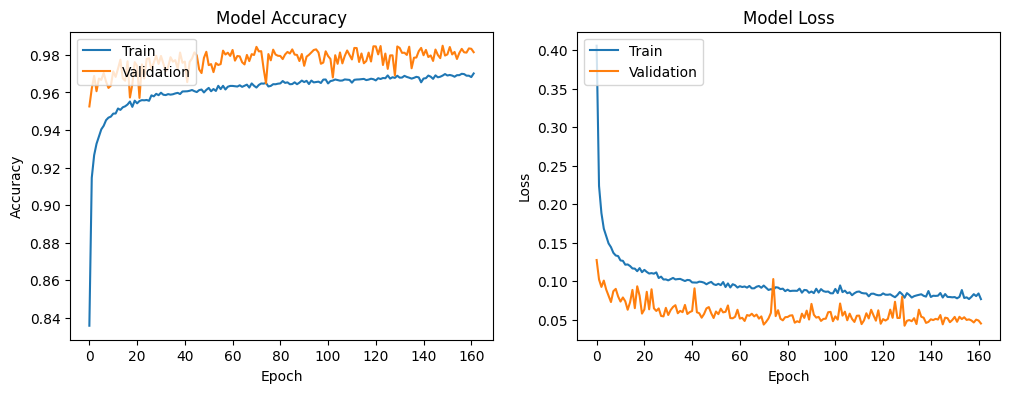

In [17]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [26]:
# Label encoding mappings for 'Jenis Kelamin'
label_encoder_gender = LabelEncoder()
label_encoder_gender.fit(['Laki-laki', 'Perempuan'])

LabelEncoder()

In [27]:
# Define the mapping for status gizi
status_gizi_mapping = {0: 'normal', 1: 'severely stunted', 2: 'stunted', 3: 'tinggi'}

def predict_status_gizi(umur, jenis_kelamin, tinggi_badan):
    # Encode the 'Jenis Kelamin'
    jenis_kelamin_encoded = label_encoder_gender.transform([jenis_kelamin])[0]

    # Create a dataframe for the input
    input_df = pd.DataFrame([[umur, jenis_kelamin_encoded, tinggi_badan]],
                            columns=['Umur (bulan)', 'Jenis Kelamin', 'Tinggi Badan (cm)'])

    # Scale the input
    input_array = scaler.transform(input_df)

    # Predict the status gizi
    prediction = model.predict(input_array)

    # Get the predicted class
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to status gizi
    predicted_status_gizi = status_gizi_mapping[predicted_class]

    return predicted_status_gizi



In [31]:
# Example usage
umur = 60  # example umur
jenis_kelamin = 'Laki-laki'  # example jenis kelamin
tinggi_badan = 110  # example tinggi badan

predicted_status_gizi = predict_status_gizi(umur, jenis_kelamin, tinggi_badan)
print(f"Predicted Status Gizi: {predicted_status_gizi}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
Predicted Status Gizi: normal


In [29]:
# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Akurasi model:", accuracy)

Akurasi model: 0.9814600348472595


In [38]:
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 782.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 58.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
   

In [39]:
# model.save_weights("model2.weights.h5")
# model.load_weights("model2.weights.h5")
import os
from tensorflow.python.saved_model.save import save
save_dir = os.path.join('/tmp/', 'tmpppe8nufo/saved_model.h5')
model.save(save_dir)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
!cd /tmp/tmpppe8nufo/
!tensorflowjs_converter --input_format=keras --output_format=tfjs_layers_model /tmp/tmpppe8nufo/saved_model.h5 /tmp/tmpppe8nufo/tfjs

2024-06-19 14:37:30.754001: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
